# Tugas Besar 1 - IF2220 Probabilitas dan Statistika
## Dibuat Oleh
| NIM      | Nama                        |
| -------- | --------------------------- |
| 13521004 | Henry Anand Septian Radityo |
| 13521007 | Matthew Mahendra            |

# Setup

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('anggur.csv')

# Cleanup untuk data NaN jika ada
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


## SOAL 1

In [49]:
for var in df.columns:
    print("Describing " + var)
    print("Mean: " + str(df[var].mean()))
    print("Median: " + str(df[var].median()))
    print("Std. Dev.: " + str(df[var].std()))
    print("Variance: " + str((df[var].std())**2))
    print("Range: " + str(df[var].max()-df[var].min()))
    print("Q1: " + str(df[var].quantile(0.25)))
    print("Q2: " + str(df[var].quantile(0.5)))
    print("Q3: " + str(df[var].quantile(0.75)))
    print("IQR: " + str(df[var].quantile(0.75) - df[var].quantile(0.25)))
    print("Skewness: " + str(df[var].skew()))
    print("Kurtosis: " + str(df[var].kurtosis()))
    print("\n")

Describing fixed acidity
Mean: 7.15253
Median: 7.15
Std. Dev.: 1.2015975764938258
Variance: 1.4438367358358355
Range: 8.17
Q1: 6.3774999999999995
Q2: 7.15
Q3: 8.0
IQR: 1.6225000000000005
Skewness: -0.028878575532660055
Kurtosis: -0.019292120932933532


Describing volatile acidity
Mean: 0.5208385000000001
Median: 0.52485
Std. Dev.: 0.09584827405534951
Variance: 0.009186891639389386
Range: 0.6652
Q1: 0.4561
Q2: 0.52485
Q3: 0.585375
IQR: 0.12927499999999997
Skewness: -0.1976986986092083
Kurtosis: 0.16185290336961788


Describing citric acid
Mean: 0.27051699999999995
Median: 0.2722
Std. Dev.: 0.04909837147076348
Variance: 0.002410650081081081
Range: 0.29290000000000005
Q1: 0.2378
Q2: 0.2722
Q3: 0.302325
IQR: 0.064525
Skewness: -0.045576058685017296
Kurtosis: -0.1046792495951605


Describing residual sugar
Mean: 2.5671036825067595
Median: 2.519430272865794
Std. Dev.: 0.9879154365046929
Variance: 0.975976909684258
Range: 5.5182004097078625
Q1: 1.896329943488683
Q2: 2.519430272865794
Q3: 3.22

# SOAL 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

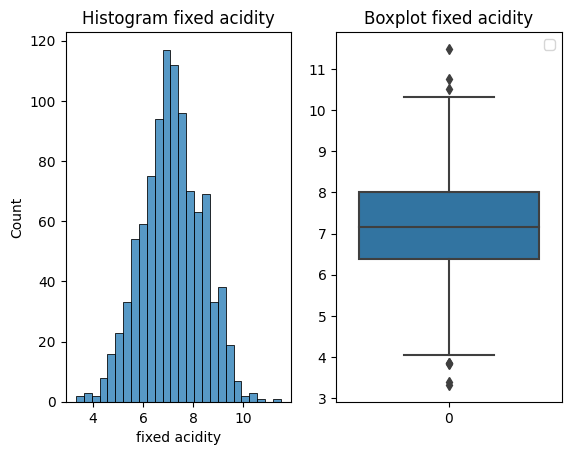

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

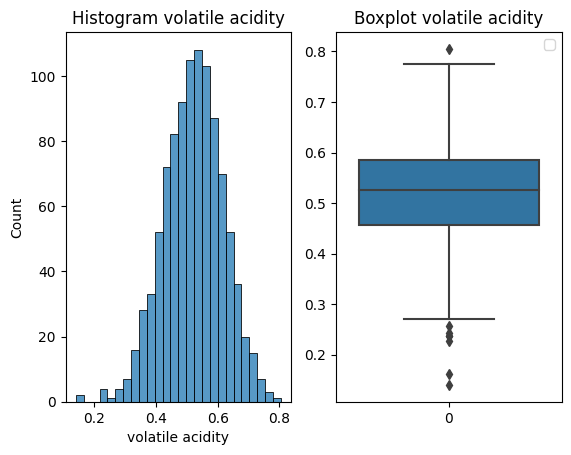

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

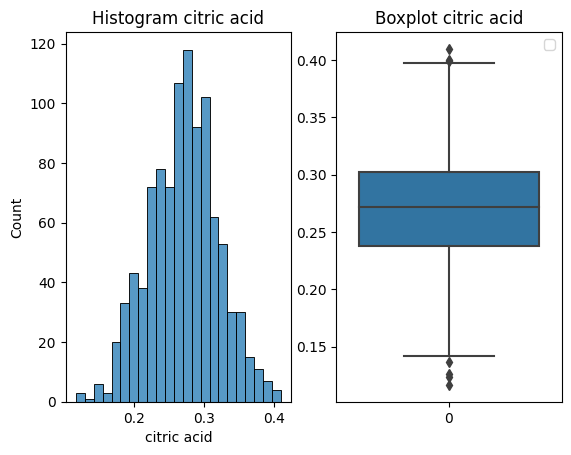

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

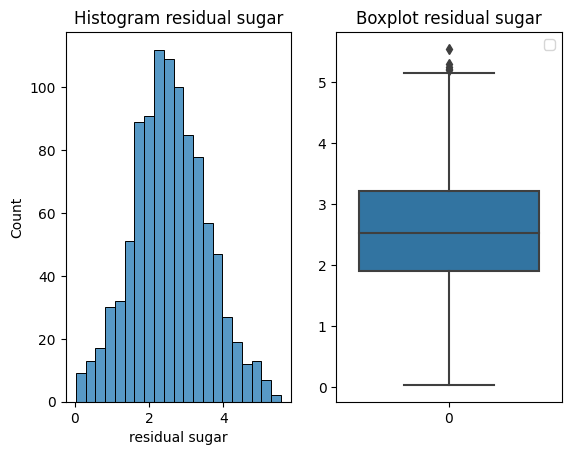

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

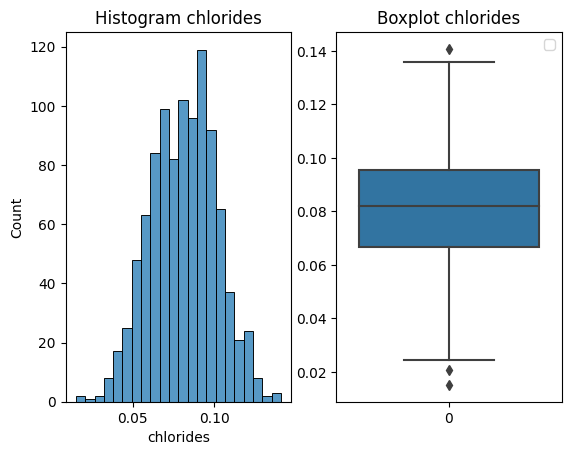

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

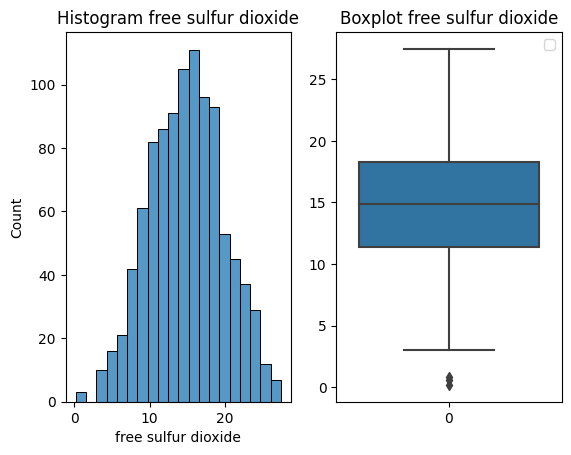

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

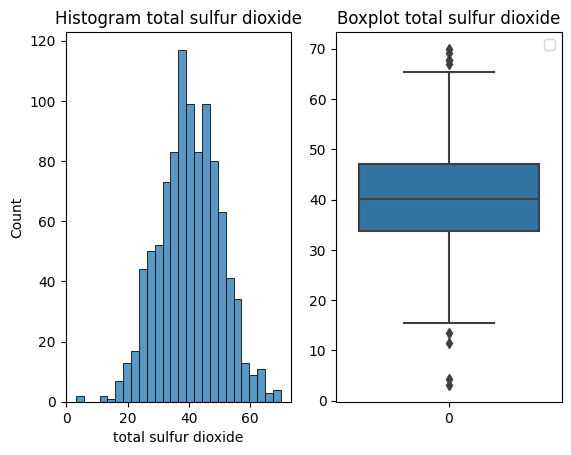

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

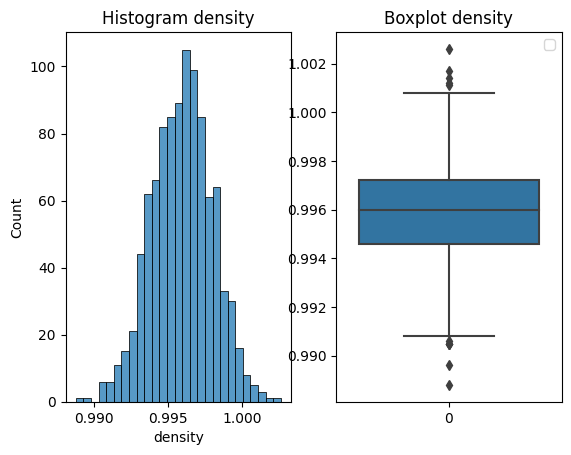

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

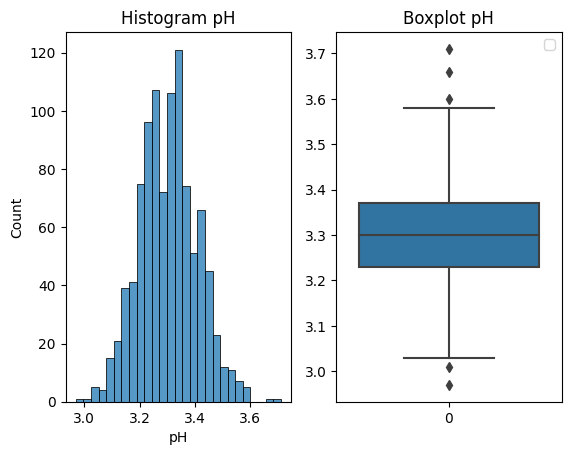

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

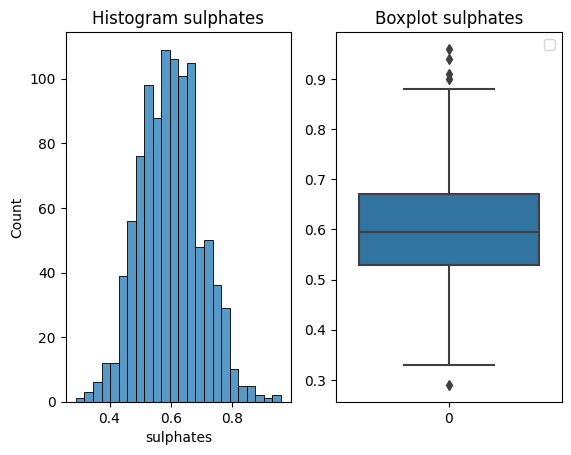

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

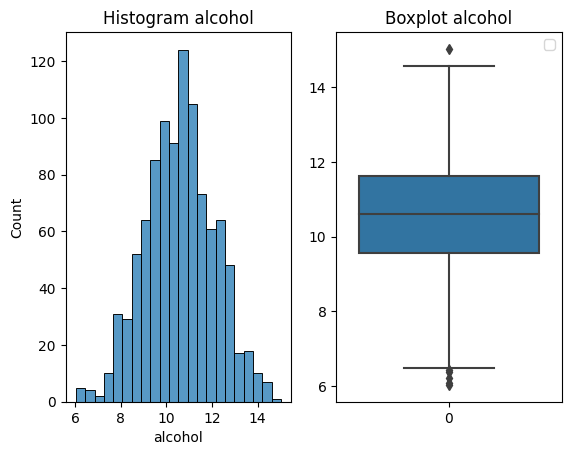

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x600 with 0 Axes>

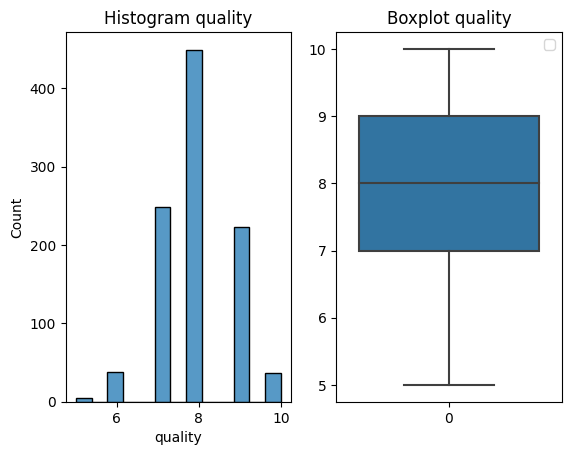

In [50]:
for var in df.columns:    
    plt.figure(figsize=(7,6))
    fig,ax = plt.subplots(1,2)
    # df[var].hist(ax = ax[0]) matplotlib
    sns.histplot(df[var], ax=ax[0])
    ax[0].set_title("Histogram " + var)
    ax[1].set_title("Boxplot " + var)
    # df.boxplot(var,ax=ax[1]) matplotlib
    sns.boxplot(df[var],ax=ax[1])
    plt.legend()
    plt.show()

## Soal 2: Penjelasan


# SOAL 3
Pengujian data apakah berdistribusi normal atau tidak menggunakan gaussian distribution

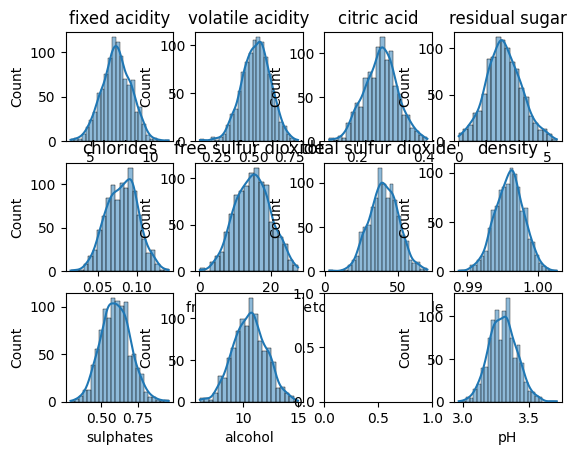

In [54]:
# plt.figure(figsize=(10,9), dpi=200)
fig,ax = plt.subplots(3,4)
for i in range(11):
    if(i < 4):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[0,i])
        ax[0,i].set_title(df.columns[i])
    elif(i < 8):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[1,i-4])
        ax[1,i-4].set_title(df.columns[i])
    elif(i < 12):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax[2,i-9])
        # ax[2,i-9].set_title(df.columns[i])
plt.show()

## Penjelasan